**Second Assignment Image and Video processing**
# Thresholding Algorithm by Otsu
Shahid Gulzar Padder

Neptun code: XPXSKK


In [99]:
import numpy as np
import cv2 as cv
from sys import maxsize
from google.colab.patches import cv2_imshow

In [100]:
h = [1]

In [101]:
def histogrm(imgs):
    rw, cl = imgs.shape
    y = np.zeros(256)
    for i in range(0, rw):
        for j in range(0, cl):
            y[imgs[i, j]] += 1
    x = np.arange(0, 256)

    return y

In [102]:
def regen_imgs(imgs, thrshld):
    rw, cl = imgs.shape
    y = np.zeros((rw, cl))
    for i in range(0, rw):
        for j in range(0, cl):
            if imgs[i, j] >= thrshld:
                y[i, j] = 255
            else:
                y[i, j] = 0
    return y

In [103]:
def cnt_pxl(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i] > 0:
            cnt += h[i]
    return cnt

In [104]:
def wieght(s, e):
    wt = 0
    for i in range(s, e):
        wt += h[i]
    return wt

In [105]:
def mean(s, e):
    mn = 0
    wt = wieght(s, e)
    for i in range(s, e):
        mn += h[i] * i

    mn = (mn / float(wt))if wt != 0 else 0
    return mn

In [106]:
def vrnce(s, e):
    vr = 0
    mn = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        vr += ((i - mn) ** 2) * h[i]

    vr = (vr / mn) if mn != 0 else 0
    return vr

In [107]:
def thrshld(h):
    cnt = count_pixel(h)
    min_v2w = maxsize
    optimal_t = 0
    for i in range(0, 256):
        vb = vrnce(0, i)
        wb = wieght(0, i) / float(cnt)

        vf = vrnce(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)

        V2w = wb * (vb) + wf * (vf)

        if min_v2w > V2w:
            min_v2w = V2w
            optimal_t = i

    return optimal_t

In [108]:
image = cv.imread('finger.png')
imgs = cv.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [109]:
h = histogrm(imgs)
o_thrshld = thrshld(h)
print("OPTIMAL THRESHOLD IS:", o_thrshld)

OPTIMAL THRESHOLD IS: 159


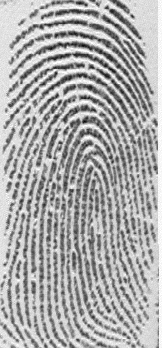

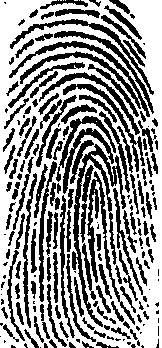

In [111]:
res = regen_imgs(imgs, o_thrshld)
cv.imwrite("/finger_OTSU.jpg", res)
cv2_imshow(image)
cv2_imshow(res)